In [ ]:
# default_exp steady_state_final_value_theorem

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#hide
%matplotlib inline

# Final Value Theorem and Steady State Error

Before we can talk about control systems there is one more concept that we need to understand

## What does it mean to have a final value?

<tr>
<td> <img src="img/55.final_values_1.png" alt="55.final_values.png" style="width: 750px;"/> </td>
</tr>

## How do we calculate the final value?

- **Time domain**
    - Final Value = $\lim_{t\rightarrow0} f(t)$
    
    This means, for example that given a differential equation:
        - $\large \ddot{x}(t) + 4\dot{x}(t) + 2x(t) + \delta(0)$ 
        - We can solve it and calculate $\large \lim\limits_{t\rightarrow0} x(t)$.

- **S-Domain**
    - We can work directly with the transfer function: $\large F(s) = \mathcal{L}(f(t))$
    - It simplifies the math: differential equations in the time domain become algebraic equations in the s-domain:
       - $\large s^2X(s)+3sX(s) + 2X(s) = 1$
    - We would like to have a way to calculate the final time value of a function using the s-domain representation of that function
    - This is where the **Final Value Theorem** comes into play.
     
    
    

## Final Value Theorem

> $\large \lim\limits_{t \rightarrow \inf} f(t) = \lim\limits_{s \rightarrow 0} sF(s)$

- We can use the Laplace transform directly
- Most of the time we already have the Laplace transform

- The Final Value Theorem does not work on every single transfer function

We can differentiate four cases:
- Right Half Plane (Real > 0)
- Imaginary axis (Real = 0)
- Left Half Plane (Real < 0)
- The Origin 

And understand what it means to have a pole in each one of these regions.

- **Right Half Plane (Real > 0):** In this case, the system is unstable: The real component is positive, and $e^{+st}$ goes to infinity.
   - The final value of a system with a pole in the RHP does not exist
   
   For ex. $G(s) = \frac{1}{s-2}$
       FVT: $\lim\limits_{s \rightarrow 0} \frac{s}{s-2}=0$
     - The FVT produces the wrong value if you use it.


- **Imaginary axis (Real = 0)**
  - We know that the system will have oscillatory modes ($e^{(jwt)}$ produces sin/cos)
  - The final value is undefined.
  
   For ex. $G(s) = \frac{1}{s^2+4}$
     FVT: $\lim\limits_{s \rightarrow 0} \frac{s}{s^2+4}=0$
  - The FVT produces the wrong value if you use it.


- **Left Half Plane (Real < 0):** In this case, the impulse response of the system is stable and eventually will go to zero.

   For ex. $G(s) = \frac{1}{s+2}$
     FVT: $\lim\limits_{s \rightarrow 0} \frac{s}{s+2}=0$
     - The FVT produces the correct value. Note that the value will be zero for every transfer function with poles only in the left half plane.



- **The Origin:** In this case we are looking at a system like the integrator 

   For ex. $G(s) = \frac{1}{s}$
     FVT: $\lim\limits_{s \rightarrow 0} \frac{s}{s}=1$
     - The FVT produces the correct value. 

**The number of poles at the origin is called _System Type_**

- Type 0: 
    - no poles at the origin
    - FV = 0 (if all poles are in the LHP)

- Type 1: 
    - one pole at the origin
    - the final value is a real number  (if all the other poles are in the LHP)

- Type 2:
    - two poles at the origin
    - the final value is $\large \inf$ (the integral of a step is a ramp)
    
- Type 3 and above:
    - three or more poles at the origin
    - the final value is $\large \inf$ (we are now integrating a ramp, etc.)
    
<tr>
<td> <img src="img/56.types_response.png" alt="56.types_response.png" style="width: 750px;"/> </td>
</tr>

- We can use the Final Value Theorem if all poles are in the Left Half Plane or at the origin (**aymptotically stable system**).
- If there is even a single pole with $\Re > 0$, or a pair of complex conjugated poles (on the imaginary axis) then we cannot use the FVT.

## Examples

Let's consider:

- $\large G(s)=\frac{1}{s^2+s}$
- $\large u(t) = \delta(t) \rightarrow U(s)=1$


- This is type 1 system: 
   - $\large G(s)=\frac{1}{s^2+s} = \frac{1}{s}\frac{1}{s+1} $
   
   <tr>
<td> <img src="img/57.example_1_poles.png" alt="57.example_1_poles" style="width: 250px;"/> </td>
</tr>

We can apply the Final Value Theorem:

$$ G(0) = \lim\limits_{s \rightarrow 0} s \frac{1}{s}\frac{1}{s+1} = 1$$

And in fact if we plot the impulse response:
- $\large y(t) = 1-e^{-t}$

We get:

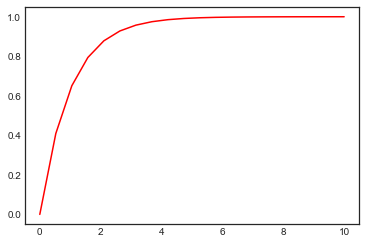

In [ ]:
time = np.linspace(0, 10, 20)
y_t = 1 - np.exp(-time)
plt.plot(time, y_t, color='red');

_______

Let's now consider the same system, but with a different input:
- $\large u(t) = 1(t)$ (a step input)
- $\large U(s) = \frac{1}{s}$

When we do this, we are adding another pole at the origin:

<tr>
<td> <img src="img/58.example-2-integrator.png" alt="58.example-2-integrator" style="width: 350px;"/> </td>
</tr>

- This is now a type 2 system
- We can apply the Final Value Theorem:

$$ G(0) = \lim\limits_{s \rightarrow 0} s \frac{1}{s}\frac{1}{s^2+s} = \inf$$

## Steady state error

Let's know see what happens when we apply these concepts to a feedback system:

<tr>
<td> <img src="img/59.feedback-error.png" alt="59.feedback-error" style="width: 500px;"/> </td>
</tr>


- We could apply the Final Value Theorem to find the final value of $Y(s)$
   - Note that we need to reduce the system into a single transfer function first.
   
- However, if the system is correctly designed we want $Y(s) \rightarrow U(s)$, so the output follows the input as closely as possible
   - e.g. We input a ramp, we would expect a ramp at the output.
   - In this case the final value theorem would give us $\large \inf$, but regardless what information have we gained?
   
- Instead, we design feedback control systems to drive the _error_ between the reference input and the output to zero.
- The final value of the error is a much better indicator of the performance of our controller.
- This is called the **_Steady State Error_** and we can use the FVT to obtain it.

First, we need to write the transfer function from the input $U(s)$ to the error $Err(s)$.
- To emphasise what we are doing, let's re-write the block diagram:

<tr>
<td> <img src="img/60.feedback-error-1.png" alt="60.feedback-error-1" style="width: 500px;"/> </td>
</tr>


We know how to write the transfer function for this already:
  $$E(s)=U(s)-Y(s)$$
  $$Y(s)=G(s)E(s)$$
  
  $$\Rightarrow E(s)=U(s)-G(s)E(s) \rightarrow E(s)+G(s)E(s) = U(s) $$
  $$ E(s)= \frac{U(s)}{1+G(s)}$$
 

**_Steady state error_** 

$$E_{ss} = \lim \limits_{s\rightarrow0} s\frac{U(s)}{1+G(s)}$$

We can now figure out what the steady state error is replacing $U(s)$ with the appropriate input we want to study the response of (e.g. $\frac{1}{s}, \frac{1}{s^2}$).

The same observations we did before apply: depending on the input we are adding poles at the origin, and hence increasing the type of the system. 
- This means that the system might not be able to follow you inputs perfectly.
- This depends on the design specifications and we might need to change the controller
   - More on this later, for now you might need to modify the system adding a zero at the origin.

---------------